In [1]:
# Import Python libraries
import os
import time
from tqdm import tqdm #to display progress bars Python code execution
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import KBinsDiscretizer

# Library for PEP8 standard
from nbpep8.nbpep8 import pep8


In [2]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [3]:
# importaing data
data10 = pd.read_csv("QueryResults2010.csv", encoding="ISO-8859-1")
data11 = pd.read_csv("QueryResults2011.csv", encoding="ISO-8859-1")
data12 = pd.read_csv("QueryResults2012.csv", encoding="ISO-8859-1")
data13 = pd.read_csv("QueryResults2013.csv", encoding="ISO-8859-1")
data14 = pd.read_csv("QueryResults2014.csv", encoding="ISO-8859-1")
data15 = pd.read_csv("QueryResults2015.csv", encoding="ISO-8859-1")
data16 = pd.read_csv("QueryResults2016.csv", encoding="ISO-8859-1")
data17 = pd.read_csv("QueryResults2017.csv", encoding="ISO-8859-1")
data18 = pd.read_csv("QueryResults2018.csv", encoding="ISO-8859-1")
data19 = pd.read_csv("QueryResults2019.csv", encoding="ISO-8859-1")
data20 = pd.read_csv("QueryResults2020.csv", encoding="ISO-8859-1")
data21 = pd.read_csv("QueryResults2021.csv", encoding="ISO-8859-1")

In [5]:
df1 = pd.concat([data10,data11], ignore_index=True)
df2 = pd.concat([df1,data12], ignore_index=True)
df3 = pd.concat([df2,data13], ignore_index=True)
df4 = pd.concat([df3,data14], ignore_index=True)
df5 = pd.concat([df4,data15], ignore_index=True)
df6 = pd.concat([df5,data16], ignore_index=True)
df7 = pd.concat([df6,data17], ignore_index=True)
df8 = pd.concat([df7,data18], ignore_index=True)
df9 = pd.concat([df8,data19], ignore_index=True)
df10 = pd.concat([df9,data20], ignore_index=True)
df = pd.concat([df10,data21], ignore_index=True)

In [6]:
df.head()

,Id,CreationDate,Title,Body,Tags,AnswerCount,Score
0,3321007,2010-07-23 18:00:21,How to add javadoc for android to Netbeans,<p>I just started using Net Beans. I am wanti...,<android><netbeans>,5,14
1,3321011,2010-07-23 18:00:44,Parsing XLS and XLSX (MS Excel) files with Ruby?,<p>Are there any gems able to parse XLS and XL...,<ruby><excel>,10,79
2,3321022,2010-07-23 18:02:03,"""Unable to start debugging"" - VS2010 ASP.NET M...",<p>I can launch debug session only once with V...,<visual-studio-2010><asp.net-mvc-2>,4,18
3,3321029,2010-07-23 18:02:43,Recursively walking a Python inheritance tree ...,<p>I'm writing some serialization/deserializat...,<python><reflection><introspection>,3,8
4,3321039,2010-07-23 18:04:43,How does the Android Market work for developers?,<p>I have some quetions:</p>\n\n<p>Should I bu...,<android><google-play>,3,6


In [7]:
# dataset infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479717 entries, 0 to 479716
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Id            479717 non-null  int64 
 1   CreationDate  479717 non-null  object
 2   Title         479717 non-null  object
 3   Body          479717 non-null  object
 4   Tags          479717 non-null  object
 5   AnswerCount   479717 non-null  int64 
 6   Score         479717 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 25.6+ MB


In [8]:
# Describe dataset
df.describe(include='all')

,Id,CreationDate,Title,Body,Tags,AnswerCount,Score
count,4.797170e+05,479717,479717,479717,479717,479717.000000,479717.000000
unique,NaN,478858,479692,479716,298484,NaN,NaN
top,NaN,2012-09-13 08:31:53,Cannot convert lambda expression to type 'stri...,"<p>I have two related numpy arrays, <code>X</c...",<android>,NaN,NaN
freq,NaN,3,2,2,2293,NaN,NaN
mean,2.737009e+07,NaN,NaN,NaN,NaN,3.963918,23.775011
std,1.778679e+07,NaN,NaN,NaN,NaN,3.043239,74.513851
min,1.992565e+06,NaN,NaN,NaN,NaN,2.000000,6.000000
25%,1.094725e+07,NaN,NaN,NaN,NaN,2.000000,7.000000
50%,2.652346e+07,NaN,NaN,NaN,NaN,3.000000,11.000000
75%,4.281188e+07,NaN,NaN,NaN,NaN,5.000000,20.000000


In [10]:
# Total number of duplicated values
print('Dupplicate entries: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Dupplicate entries: 0


In [9]:
# # total number of missing values
print(df.isnull().sum())

Id              0
CreationDate    0
Title           0
Body            0
Tags            0
AnswerCount     0
Score           0
dtype: int64


In [11]:
df.set_index('Id', inplace=True)

In [12]:
 ## Data exploration

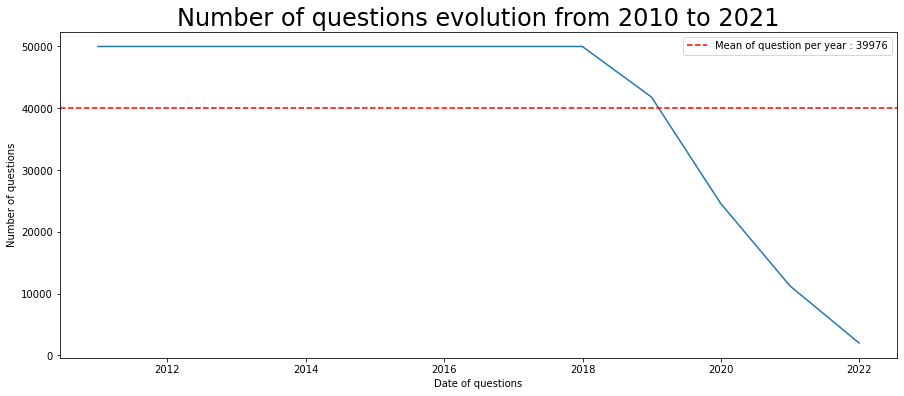

In [13]:
# Convert CreationDate to datetime format
df['CreationDate'] = pd.to_datetime(df['CreationDate'])

# Grouper with 1 year delta
post_year = df.groupby(pd.Grouper(key='CreationDate',
                                    freq='1Y')).agg({'Title': 'count'})

# Plot evolution
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=post_year, x=post_year.index, y='Title')
plt.axhline(post_year.Title.mean(), 
            color="r", linestyle='--',
            label="Mean of question per year : {:04d}"\
                   .format(int(post_year.Title.mean())))
plt.xlabel("Date of questions")
plt.ylabel("Number of questions")
plt.title("Number of questions evolution from 2010 to 2021", fontsize=24)
plt.legend()
plt.show()

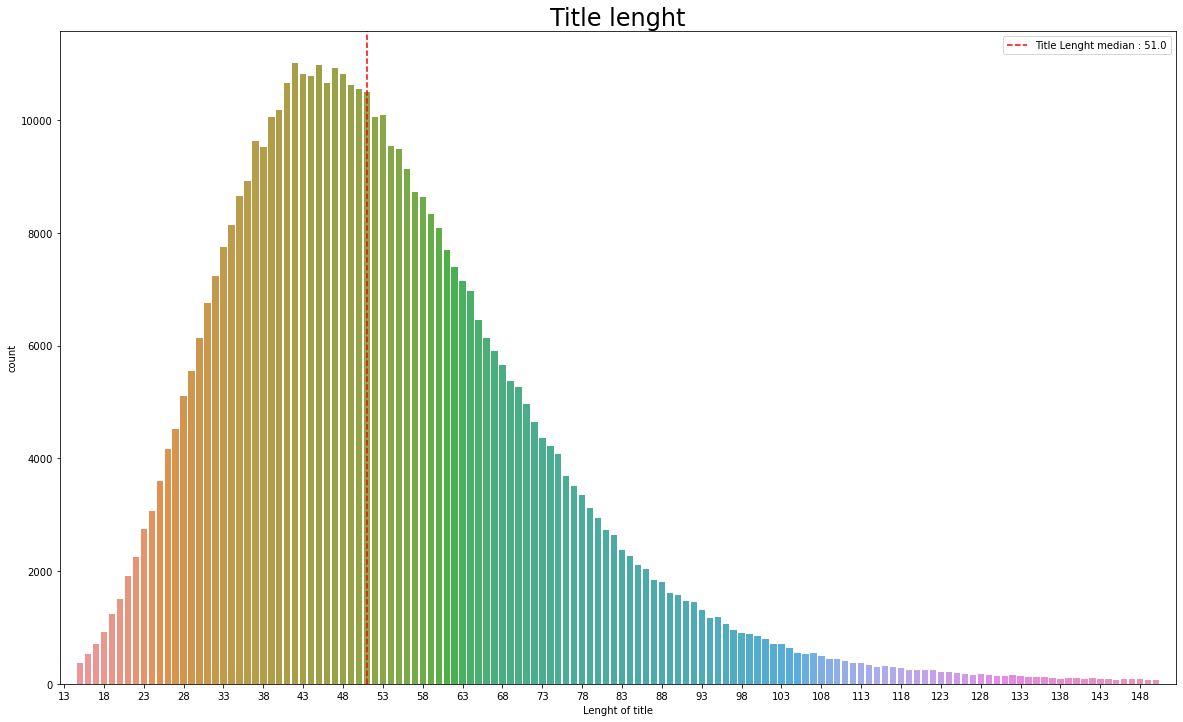

In [14]:
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=df.Title.str.len())
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 5))
plt.axvline(df.Title.str.len().median() - df.Title.str.len().min(),
            color="r", linestyle='--',
            label="Title Lenght median : "+str(df.Title.str.len().median()))
ax.set_xlabel("Lenght of title")
plt.title("Title lenght", fontsize=24)
plt.legend()
plt.show()

In [15]:
# Discretizer for Body characters lenght
X = pd.DataFrame(df.Body.str.len())

# Sklearn discretizer with 200 bins
discretizer = KBinsDiscretizer(n_bins=200,
                               encode='ordinal',
                               strategy='uniform')
body_lenght = discretizer.fit_transform(X)
body_lenght = discretizer.inverse_transform(body_lenght)
body_lenght = pd.Series(body_lenght.reshape(-1))

No handles with labels found to put in legend.


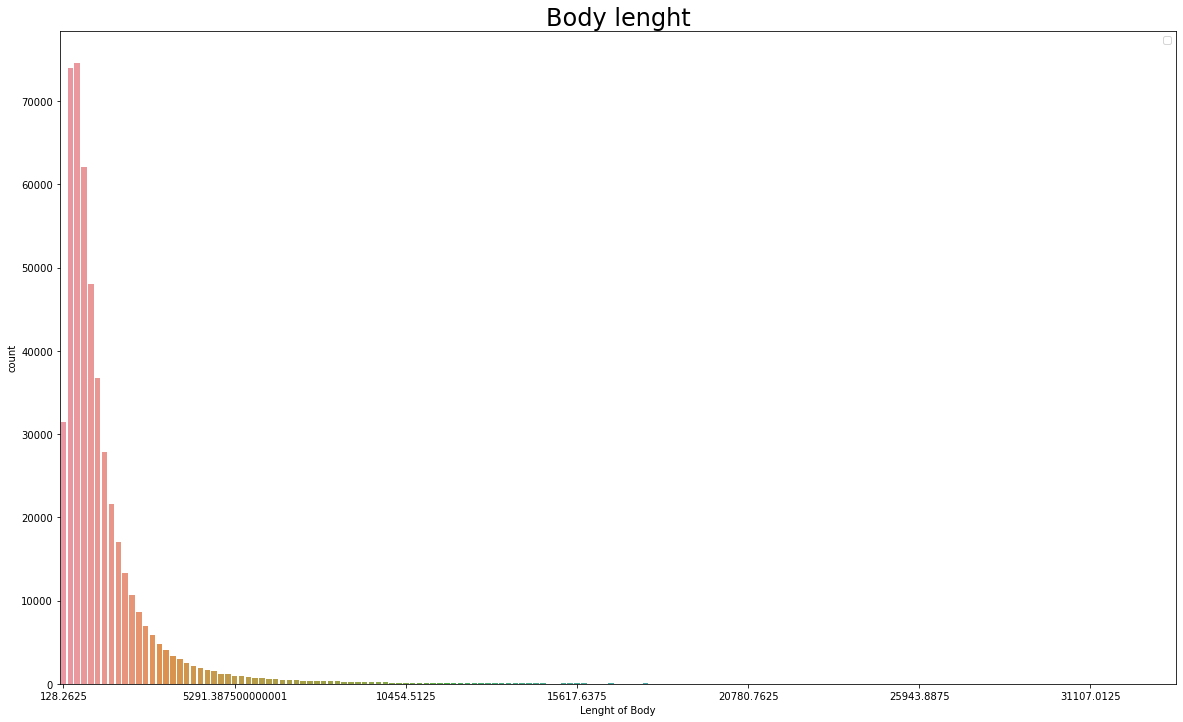

In [16]:
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=body_lenght)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
ax.set_xlabel("Lenght of Body")
plt.title("Body lenght",
          fontsize=24)
plt.legend()
plt.show()

In [17]:
# Filter df on body lenght
df = df[df.Body.str.len() < 5000]
df.shape

(465238, 6)

In [18]:
# Tag analysis

In [19]:
df['Tags']

Id
3321007                                   <android><netbeans>
3321011                                         <ruby><excel>
3321022                   <visual-studio-2010><asp.net-mvc-2>
3321029                   <python><reflection><introspection>
3321039                                <android><google-play>
                                  ...                        
67240279    <flutter><android-studio><dart><gradle><flutte...
67240635                                     <python><django>
67244301                            <python><python-3.x><pip>
67245700    <c++><c++17><copy-elision><return-value-optimi...
67246010                                    <jnlp><kvm><ipmi>
Name: Tags, Length: 465238, dtype: object

In [20]:
# Replace open and close balise between tags
df['Tags'] = df['Tags'].str.translate(str.maketrans({'<': '', '>': ','}))

# Delete last "," for each row
df['Tags'] = df['Tags'].str[:-1]
df['Tags']

Id
3321007                                      android,netbeans
3321011                                            ruby,excel
3321022                      visual-studio-2010,asp.net-mvc-2
3321029                       python,reflection,introspection
3321039                                   android,google-play
                                  ...                        
67240279    flutter,android-studio,dart,gradle,flutter-dep...
67240635                                        python,django
67244301                                python,python-3.x,pip
67245700     c++,c++17,copy-elision,return-value-optimization
67246010                                        jnlp,kvm,ipmi
Name: Tags, Length: 465238, dtype: object

In [21]:
def count_split_tags(data, column, separator):
    """This function allows you to split the different words contained
    in a Pandas Series cell and to inject them separately into a list.
    This makes it possible, for example, to count the occurrences of words.

    Parameters
    ----------------------------------------
    data : Pandas Dataframe
        Dataframe to use.
    column : string
        Column of the dataframe to use
    separator : string
        Separator character for str.split.
    ----------------------------------------
    """
    list_words = []
    for word in data[column].str.split(separator):
        list_words.extend(word)
    data_list_words = pd.DataFrame(list_words, columns=["Tag"])
    data_list_words = data_list_words.groupby("Tag")\
        .agg(tag_count=pd.NamedAgg(column="Tag", aggfunc="count"))
    data_list_words.sort_values("tag_count", ascending=False, inplace=True)
    return data_list_words

In [22]:
tags_list = count_split_tags(data=df, column='Tags', separator=',')
print("Le jeu de données compte {} tags.".format(tags_list.shape[0]))

Le jeu de données compte 30267 tags.


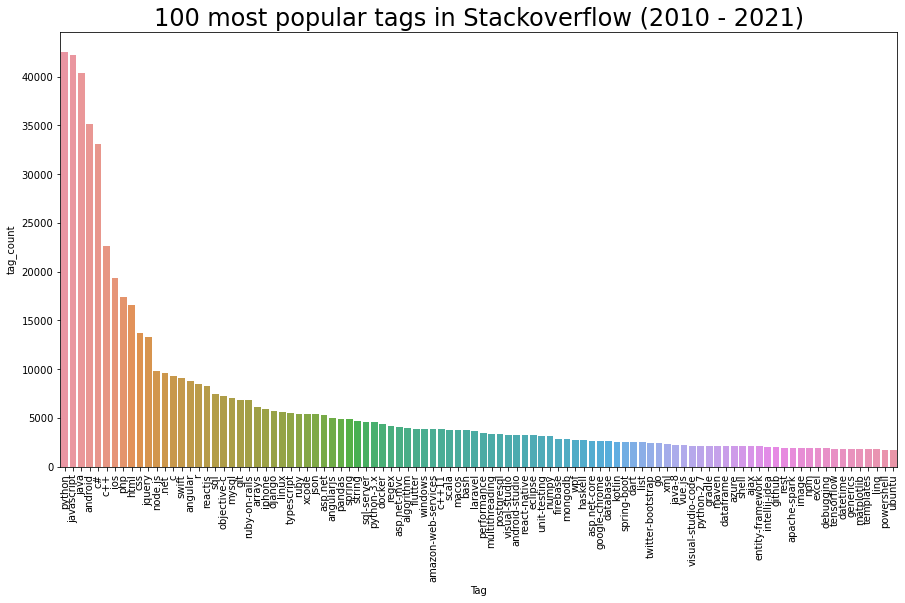

In [23]:
# Plot the results of splits
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=tags_list.iloc[0:100, :],
            x=tags_list.iloc[0:100, :].index,
            y="tag_count")
plt.xticks(rotation=90)
plt.title("100 most popular tags in Stackoverflow (2010 - 2021)", fontsize=24)
plt.show()

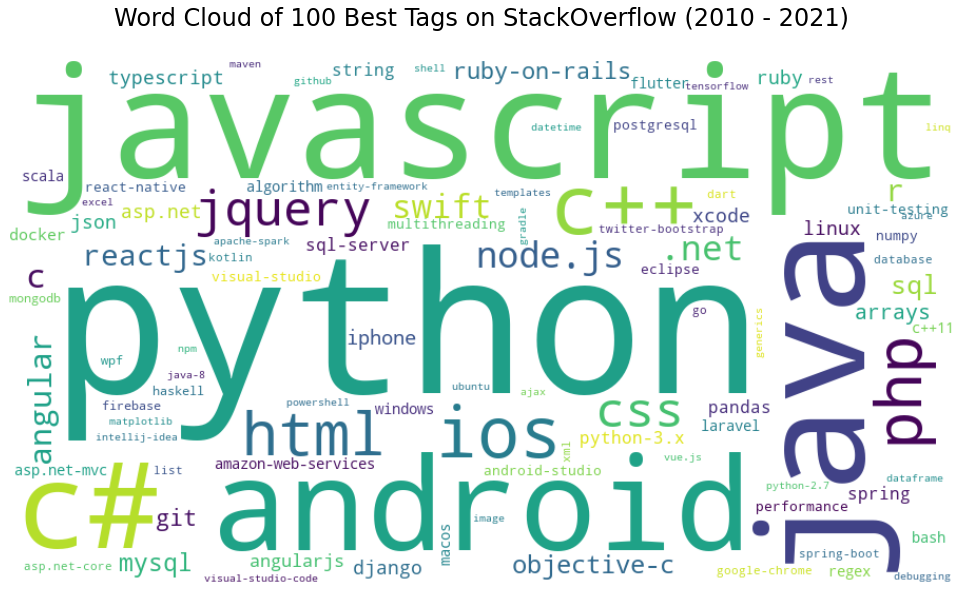

In [24]:
# Plot word cloud with tags_list (frequencies)
fig = plt.figure(1, figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="white",
                      max_words=100, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(tags_list.to_dict()['tag_count'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Word Cloud of 100 Best Tags on StackOverflow (2010 - 2021)\n", fontsize=24)
plt.show()

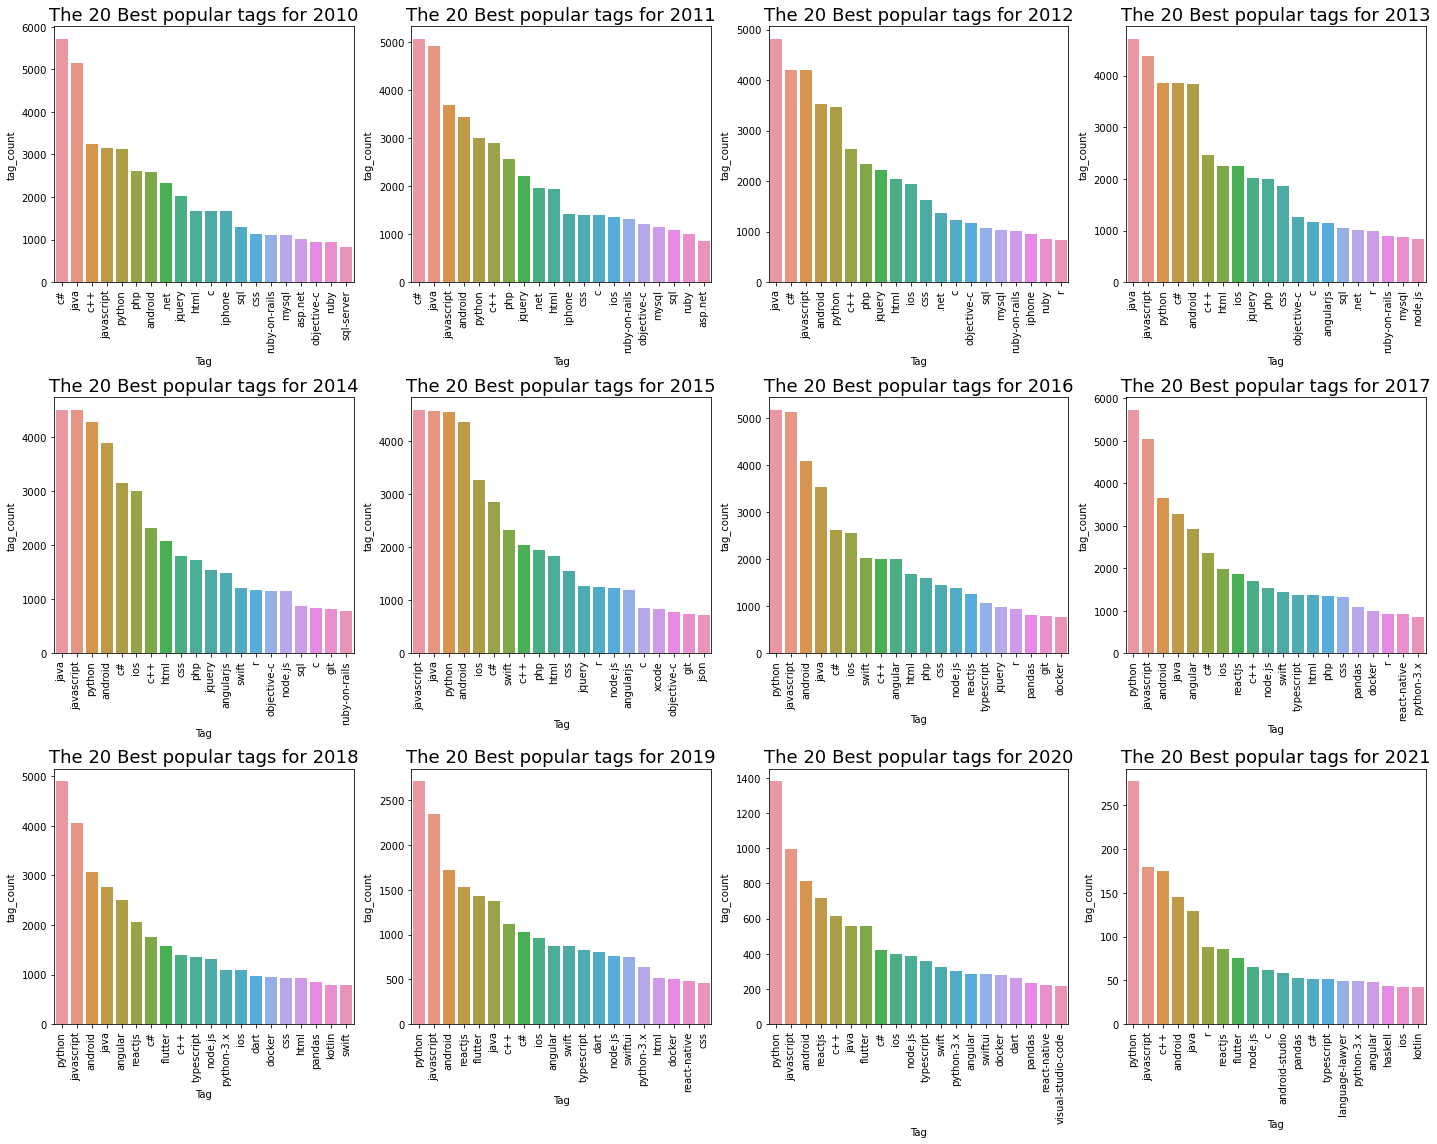

In [25]:
# Subplots parameters
years = {0: 2010, 1: 2011, 2: 2012, 3: 2013, 4: 2014, 5: 2015, 
         6: 2016, 7: 2017, 8: 2018, 9: 2019, 10: 2020, 11: 2021}
#colors = {0: "#f48023", 1: "#d16e1e",
          #2: "#b25d19", 3: "#904b14"}
subplots = 12
cols = 4
rows = subplots // cols
rows += subplots % cols
position = range(1, subplots + 1)

# Plot popular tags for each year
fig = plt.figure(1, figsize=(20, 16))
for k in range(subplots):
    subset = df[df["CreationDate"].dt.year == years[k]]
    temp_list = count_split_tags(data=subset, column='Tags', separator=',')
    ax = fig.add_subplot(rows, cols, position[k])
    sns.barplot(data=temp_list.iloc[0:20, :],
            x=temp_list.iloc[0:20, :].index,
            y="tag_count")
    plt.xticks(rotation=90)
    ax.set_title("The 20 Best popular tags for {}".format(years[k]),
                 fontsize=18)

fig.tight_layout()
plt.show()

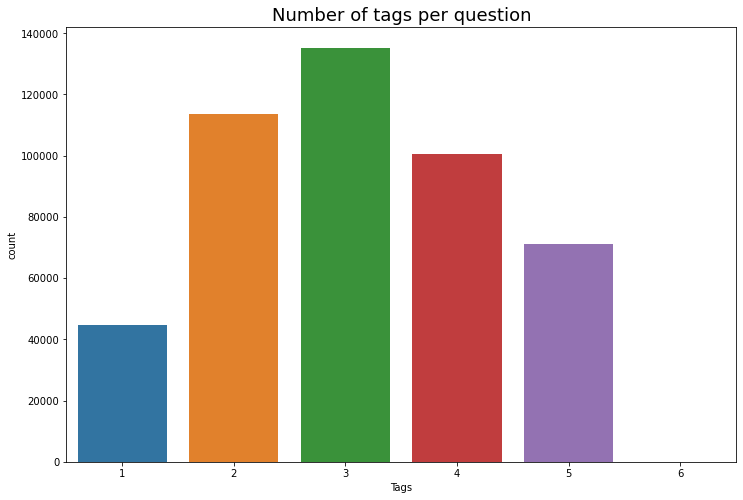

In [26]:
# Create a list of Tags and count the number
df['Tags_list'] = df['Tags'].str.split(',')
df['Tags_count'] = df['Tags_list'].apply(lambda x: len(x))

# Plot the result
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df.Tags_count)
ax.set_xlabel("Tags")
plt.title("Number of tags per question",
          fontsize=18)
plt.show()

In [27]:
def filter_tag(x, top_list):
    """Comparison of the elements of 2 lists to 
    check if all the tags are found in a list of top tags.

    Parameters
    ----------------------------------------
    x : list
        List of tags to test.
    ----------------------------------------
    """
    temp_list = []
    for item in x:
        if (item in top_list):
            #x.remove(item)
            temp_list.append(item)
    return temp_list

In [28]:
top_tags = list(tags_list.iloc[0:100].index)
df['Tags_list'] = df['Tags_list']\
                    .apply(lambda x: filter_tag(x, top_tags))
df['number_of_tags'] = df['Tags_list'].apply(lambda x : len(x))
df = df[df.number_of_tags > 0]
print("New size of dataset : {} questions.".format(df.shape[0]))

New size of dataset : 403527 questions.


In [29]:
df['Tags_list']

Id
3321007                                   [android]
3321011                               [ruby, excel]
3321029                                    [python]
3321039                                   [android]
3321082                                        [c#]
                             ...                   
67234283                                     [ruby]
67240279    [flutter, android-studio, dart, gradle]
67240635                           [python, django]
67244301                       [python, python-3.x]
67245700                                      [c++]
Name: Tags_list, Length: 403527, dtype: object

In [30]:
#Body

In [31]:
df['Body']

Id
3321007     <p>I just started using Net Beans.  I am wanti...
3321011     <p>Are there any gems able to parse XLS and XL...
3321029     <p>I'm writing some serialization/deserializat...
3321039     <p>I have some quetions:</p>\n\n<p>Should I bu...
3321082     <p>I'm using Visual Studio 2008 and I need cre...
                                  ...                        
67234283    <p>When I try to match for the string '3' in a...
67240279    <p>I reinstalled my android studio since the s...
67240635    <p>After creating a new project with <code>dja...
67244301    <p>I have a M1 Mac and I just noticed that whe...
67245700    <p>Consider the following example code in C++ ...
Name: Body, Length: 403527, dtype: object

In [32]:
# Convert to list
data = df.Body.values.tolist()

In [33]:
data

["<p>I just started using Net Beans.  I am wanting to try my hand at developing android apps.  I got the android sdk downloaded and everything is working well.  I can create little apps and run them in the emulator.  However, the intelisense popup for the android methods says that the Javadoc isn't found.  Is there a way to add it?</p>\n",
 "<p>Are there any gems able to parse XLS and XLSX files? I've found Spreadsheet and ParseExcel, but they both don't understand XLSX format.</p>\n",
 '<p>I\'m writing some serialization/deserialization code in Python that will read/write an inheritance hierarchy from some JSON. The exact composition will not be known until the request is sent in.</p>\n\n<p>So, I deem the elegant solution to recursively introspect the Python class hierarchy to be emitted and then, on the way back up through the tree, install the correct values in a Python basic type.</p>\n\n<pre><code>E.g.,\n\nA\n|\n|\\\n| \\\nB  C\n</code></pre>\n\n<p>If I call my "introspect" routin

In [34]:
def remove_code(x):
    """Function based on the Beautifulsoup library intended to replace 
    the content of all the <code> </code> tags of a text specified as a parameter.

    Parameters
    ----------------------------------------
    x : string
        Sequence of characters to modify.
    ----------------------------------------
    """
    soup = BeautifulSoup(x,"lxml")
    code_to_remove = soup.findAll("code")
    for code in code_to_remove:
        code.replace_with(" ")
    return str(soup)

In [35]:
# Delete <code> in Body text
df['Body'] = df['Body'].apply(remove_code)
# Delete all html tags
df['Body'] = [BeautifulSoup(text,"lxml").get_text() for text in df['Body']]
print(df['Body'].head())

Id
3321007    I just started using Net Beans.  I am wanting ...
3321011    Are there any gems able to parse XLS and XLSX ...
3321029    I'm writing some serialization/deserialization...
3321039    I have some quetions:\nShould I buy any licens...
3321082    I'm using Visual Studio 2008 and I need create...
Name: Body, dtype: object


In [36]:
# Create feature "lang" with langdetect library
def detect_lang(x):
    try:
        return detect(x)
    except:
        pass

df['lang'] = df.Body.apply(detect_lang)

In [37]:
# Count titles for each language
pd.DataFrame(df.lang.value_counts())

,lang
en,403252
fr,29
af,23
no,19
ca,19
it,10
da,10
nl,10
pt,7
de,6


In [38]:
# Deletion No English language data
df = df[df['lang']=='en']

In [39]:
def remove_pos(nlp, x, pos_list):
    doc = nlp(x)
    list_text_row = []
    for token in doc:
        if(token.pos_ in pos_list):
            list_text_row.append(token.text)
    join_text_row = " ".join(list_text_row)
    join_text_row = join_text_row.lower().replace("c #", "c#")
    
    return join_text_row

In [40]:
def text_cleaner(x, nlp, pos_list):
  
    # Remove POS not in "NOUN", "PROPN"
    x = remove_pos(nlp, x, pos_list)
    # Case normalization
    x = x.lower()
    # Remove unicode characters
    x = x.encode("ascii", "ignore").decode()
    # Remove English contractions
    x = re.sub("\'\w+", '', x)
    # Remove ponctuation but not # (for C# for example)
    x = re.sub('[^\\w\\s#]', '', x)
    # Remove URLs
    x = re.sub(r'http*\S+', '', x)
    # Remove numbers
    x = re.sub(r'\w*\d+\w*', '', x)
    # Remove extra whitespaces
    x = re.sub('\s+', ' ', x)
    
    # Return cleaned text
    return x

In [41]:
# Apply cleaner on Body
# Spacy features
nlp = spacy.load("en_core_web_sm")

pos_list = ["NOUN","PROPN"]

tqdm.pandas()
df['Body'] = df.Body.progress_apply(lambda x : text_cleaner(x, nlp, pos_list))

print(df['Body'].head())

100%|████████████████████████████████████████████████████████████████████████| 403252/403252 [1:27:17<00:00, 76.99it/s]

Id
3321007    net beans hand android apps android sdk apps e...
3321011    gems xls xlsx files spreadsheet parseexcel xls...
3321029    serialization deserialization code python inhe...
3321039    quetions license applications profit sale appl...
3321082    visual studio excel sheet open xml sdk datatab...
Name: Body, dtype: object


In [42]:
# Tockenization
df['Body'] = df.Body.apply(nltk.tokenize.word_tokenize)

# List of stop words in "EN" from NLTK
stop_words = stopwords.words("english")

# Remove stop words
df['Body'] = df.Body\
    .apply(lambda x : [word for word in x
                       if word not in stop_words
                       and len(word)>2])

print(df['Body'].head())

Id
3321007    [net, beans, hand, android, apps, android, sdk...
3321011    [gems, xls, xlsx, files, spreadsheet, parseexc...
3321029    [serialization, deserialization, code, python,...
3321039    [quetions, license, applications, profit, sale...
3321082    [visual, studio, excel, sheet, open, xml, sdk,...
Name: Body, dtype: object


In [44]:
# Apply lemmatizer on Body

wn = WordNetLemmatizer()
df['Body'] = df.Body\
    .apply(lambda x : [wn.lemmatize(word) for word in x])

print(df['Body'].head())

Id
3321007    [net, bean, hand, android, apps, android, sdk,...
3321011    [gem, xl, xlsx, file, spreadsheet, parseexcel,...
3321029    [serialization, deserialization, code, python,...
3321039    [quetions, license, application, profit, sale,...
3321082    [visual, studio, excel, sheet, open, xml, sdk,...
Name: Body, dtype: object


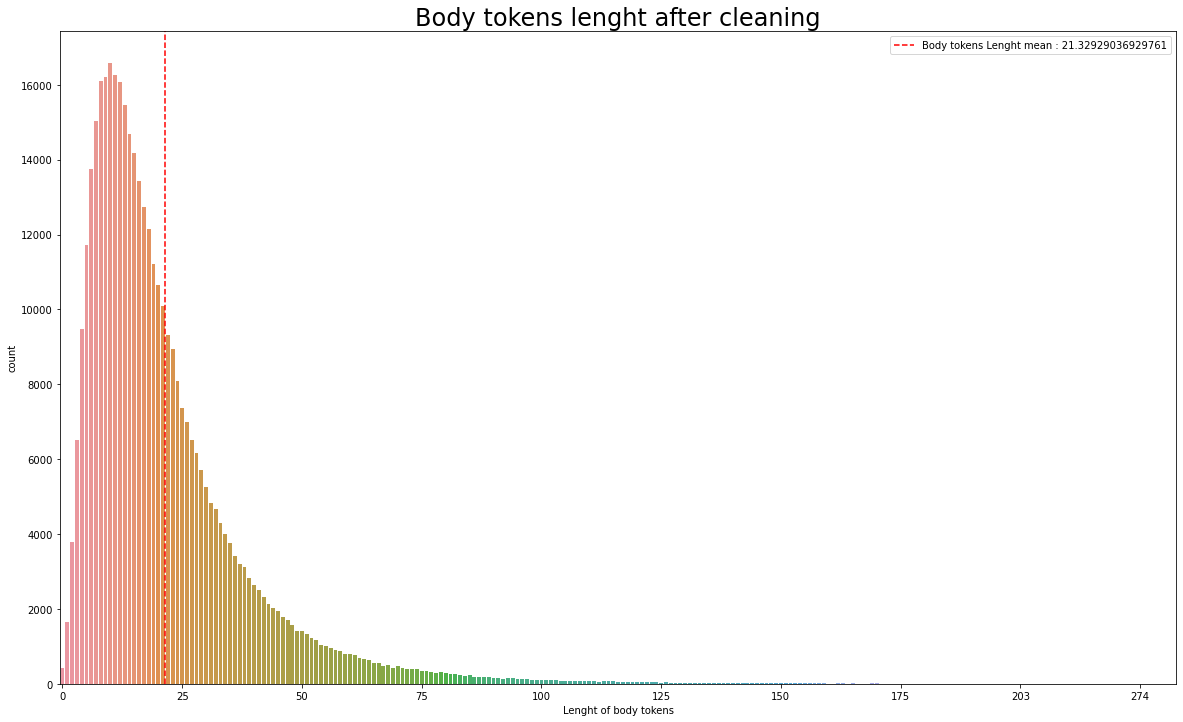

In [46]:
# Calculate lenght of each list in Body
df['body_tokens_count'] = [len(_) for _ in df.Body]

# Countplot of body lenght
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=df.body_tokens_count)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
plot_mean = df.body_tokens_count.mean()
plt.axvline(plot_mean - df.body_tokens_count.min(),
            color="r", linestyle='--',
            label="Body tokens Lenght mean : "+str(plot_mean))
ax.set_xlabel("Lenght of body tokens")
plt.title("Body tokens lenght after cleaning",
          fontsize=24)
plt.legend()
plt.show()

In [47]:
# Create a list of all tokens for Body
full_corpus = []
for i in df['Body']:
    full_corpus.extend(i)

In [48]:
# Calculate distribition of words in Body token list
body_dist = nltk.FreqDist(full_corpus)
body_dist = pd.DataFrame(body_dist.most_common(2000),
                         columns=['Word', 'Frequency'])
body_dist.describe()

,Frequency
count,2000.000000
mean,3812.614000
std,9916.809181
min,318.000000
25%,522.000000
50%,964.500000
75%,2760.750000
max,167028.000000


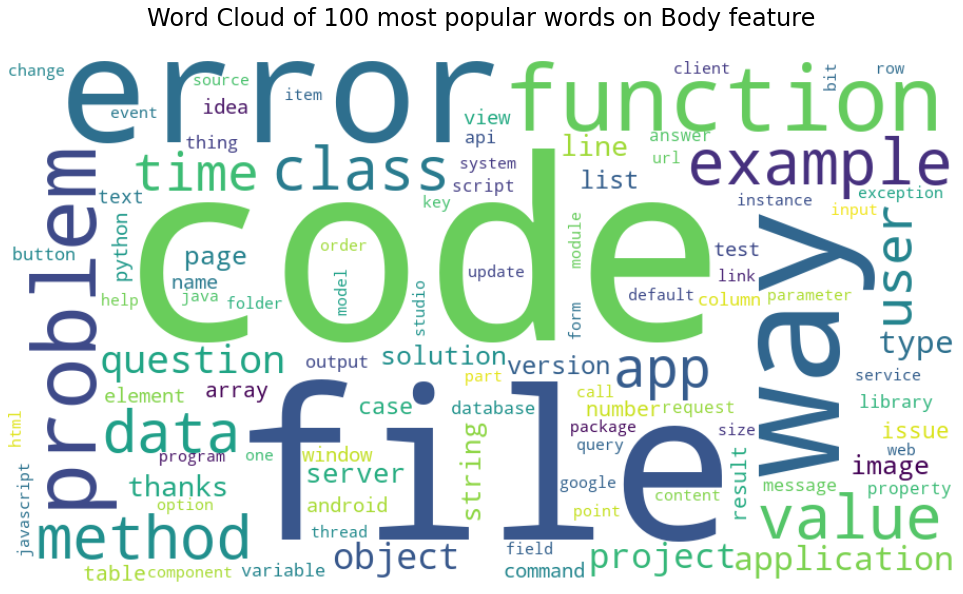

In [49]:
# Plot word cloud with tags_list (frequencies)
fig = plt.figure(1, figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="white",
                      max_words=100, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(body_dist.set_index('Word').to_dict()['Frequency'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Word Cloud of 100 most popular words on Body feature\n",
          fontsize=24)
plt.show()

In [50]:
# Title

In [51]:
def text_cleaner(x, nlp, pos_list, lang="english"):
    """Function allowing to carry out the preprossessing on the textual data. 
        It allows you to remove extra spaces, unicode characters, 
        English contractions, links, punctuation and numbers.
        
        The re library for using regular expressions must be loaded beforehand.
        The SpaCy and NLTK librairies must be loaded too. 

    Parameters
    ----------------------------------------
    x : string
        Sequence of characters to modify.
    ----------------------------------------
    """
    # Remove POS not in "NOUN", "PROPN"
    x = remove_pos(nlp, x, pos_list)
    # Case normalization
    x = x.lower()
    # Remove unicode characters
    x = x.encode("ascii", "ignore").decode()
    # Remove English contractions
    x = re.sub("\'\w+", '', x)
    # Remove ponctuation but not # (for C# for example)
    x = re.sub('[^\\w\\s#]', '', x)
    # Remove links
    x = re.sub(r'http*\S+', '', x)
    # Remove extra spaces
    x = re.sub('\s+', ' ', x)
        
    # Tokenization
    x = nltk.tokenize.word_tokenize(x)
    # List of stop words in select language from NLTK
    stop_words = stopwords.words(lang)
    # Remove stop words
    x = [word for word in x if word not in stop_words 
         and len(word)>2]
    # Lemmatizer
    wn = nltk.WordNetLemmatizer()
    x = [wn.lemmatize(word) for word in x]
    
    # Return cleaned text
    return x

In [52]:
# Spacy features
nlp = spacy.load("en_core_web_sm")

pos_list = ["NOUN","PROPN"]

# Apply full cleaner on Title

df['Title'] = df.Title\
                            .progress_apply(lambda x: 
                                            text_cleaner(x,
                                                         nlp,
                                                         pos_list,
                                                         "english"))

print(df['Title'].head())

100%|█████████████████████████████████████████████████████████████████████████| 403252/403252 [30:13<00:00, 222.35it/s]

Id
3321007                       [android, netbeans]
3321011             [xl, xlsx, excel, file, ruby]
3321029    [python, inheritance, tree, run, time]
3321039        [android, market, work, developer]
3321082                   [excel, datatable, xml]
Name: Title, dtype: object


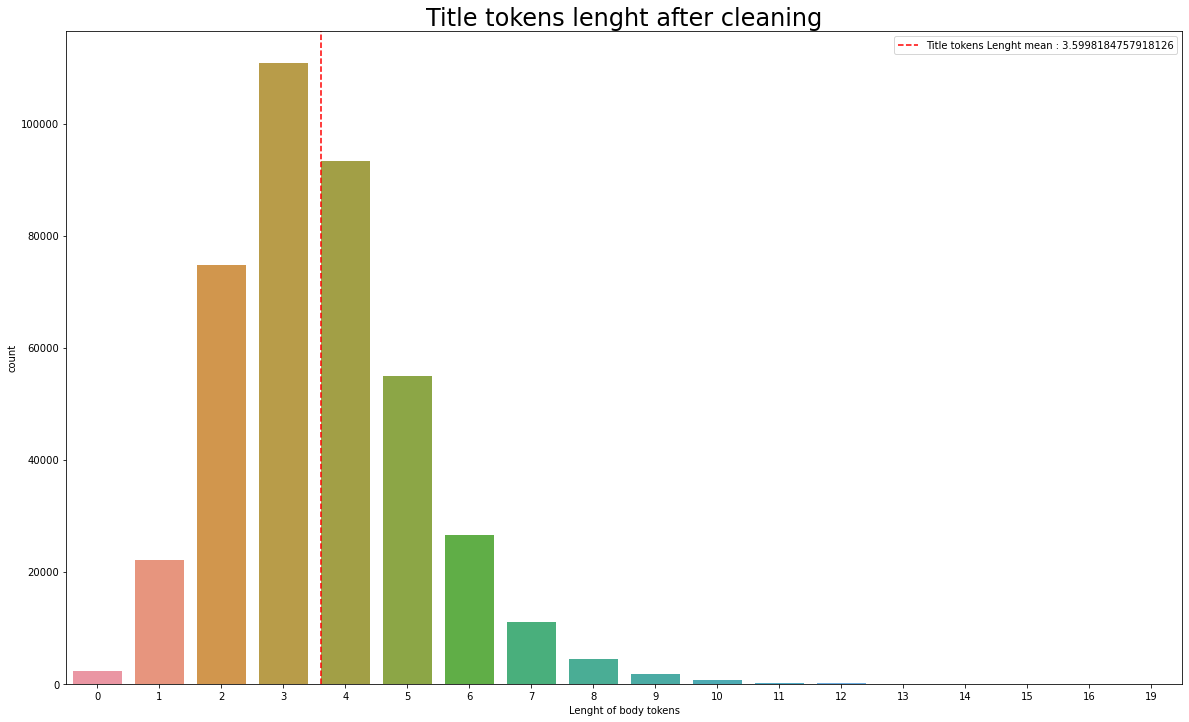

In [53]:
# Calculate lenght of each list in Body
df['Title_tokens_count'] = [len(_) for _ in df.Title]

# Countplot of body lenght
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=df.Title_tokens_count)
mean_plot = df.Title_tokens_count.mean()
plt.axvline(mean_plot - df.Title_tokens_count.min(),
            color="r", linestyle='--',
            label="Title tokens Lenght mean : "+str(mean_plot))
ax.set_xlabel("Lenght of body tokens")
plt.title("Title tokens lenght after cleaning",
          fontsize=24)
plt.legend()
plt.show()

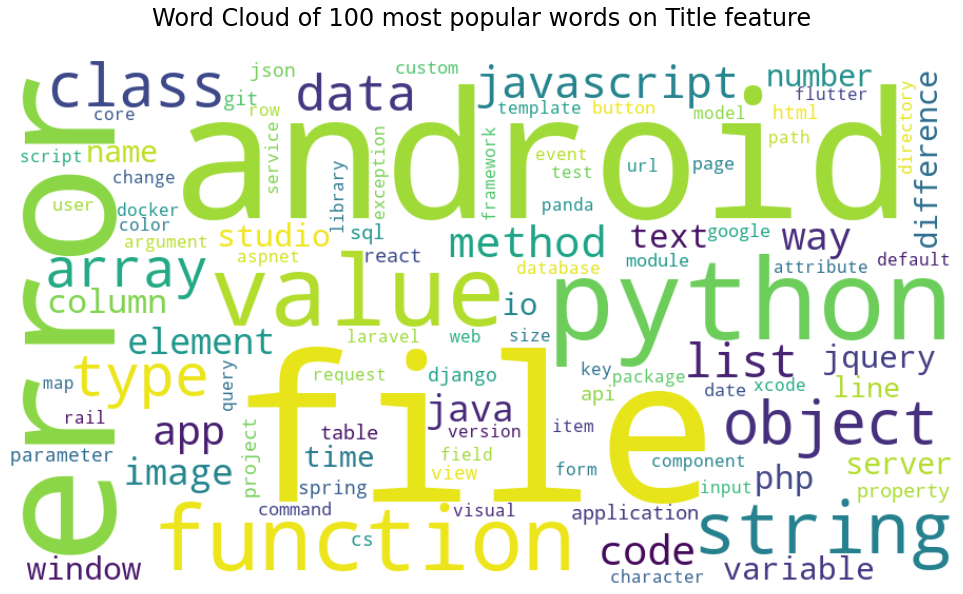

In [57]:
# Create a list of all tokens for Title
full_corpus_t = []
for i in df['Title']:
    full_corpus_t.extend(i)

# Calculate distribition of words in Title token list
title_dist = nltk.FreqDist(full_corpus_t)
title_dist = pd.DataFrame(title_dist.most_common(500),
                          columns=['Word', 'Frequency'])

# Plot word cloud with tags_list (frequencies)
fig = plt.figure(1, figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="white",
                      max_words=100, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(title_dist.set_index('Word').to_dict()['Frequency'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Word Cloud of 100 most popular words on Title feature\n", fontsize=24)
plt.show()

In [ ]:
# export to CSV

In [59]:
data= df[['Title',
             'Body',
             'Tags_list']]

In [60]:
data.head()

,Title,Body,Tags_list
Id,,,
3321007,"[android, netbeans]","[net, bean, hand, android, apps, android, sdk,...",[android]
3321011,"[xl, xlsx, excel, file, ruby]","[gem, xl, xlsx, file, spreadsheet, parseexcel,...","[ruby, excel]"
3321029,"[python, inheritance, tree, run, time]","[serialization, deserialization, code, python,...",[python]
3321039,"[android, market, work, developer]","[quetions, license, application, profit, sale,...",[android]
3321082,"[excel, datatable, xml]","[visual, studio, excel, sheet, open, xml, sdk,...",[c#]


In [61]:
# Export to CSV
data.to_csv("projet5_to_modelise_final.csv", sep=";")